# Implementing Random Forest in Python

#### By: Justin Nunez
#### Statistical Machine Learning Spring 2018

______________________________________________________________________________________
### Data that will be used is 2016 weather data from NOAA Climate Data Online tool
#### We will work with temperature data

_____________________________

# Python

In [56]:
# importing our libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
features = pd.read_csv("/Users/justinnunez/Downloads/temps.csv")
features.head(15);

### Following are explanations of the columns:
#### year: 2016 for all data points
#### month: number for month of the year
#### day: number for day of the year
#### week: day of the week as a character string
#### temp_2: max temperature 2 days prior
#### temp_1: max temperature 1 day prior
#### average: historical average max temperature
#### actual: max temperature measurement
#### friend: your friend’s prediction, a random number between 20 below the average and 20 above the average

In [5]:
# we will look at the shape of our data

features.shape;

# does not correlate with 366 days in 2016, which shows missing data

In [26]:
features.columns;

In [6]:
# check for anomalies
features.describe();

In [27]:
# check for variable types: quantitative and qualitative
features.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
year              348 non-null int64
month             348 non-null int64
day               348 non-null int64
week              348 non-null object
temp_2            348 non-null int64
temp_1            348 non-null int64
average           348 non-null float64
actual            348 non-null int64
forecast_noaa     348 non-null int64
forecast_acc      348 non-null int64
forecast_under    348 non-null int64
friend            348 non-null int64
dtypes: float64(1), int64(10), object(1)
memory usage: 32.7+ KB


## For categorical variables we will perform one hot encoding
## which creates dummy variables for us without hard-coding it.

In [58]:
# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(features)
features.iloc[:,5:].head(5)

,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,46.0,44,46,46,46,41,0,0,0,0,0,1,0


### We want to predict "Actual" temperature

In [59]:
labels = np.array(features['actual'])
# Separate it from our data now

In [60]:
# We want to separate our predictor variable and turn it into a numpy array
features = features.drop('actual', axis = 1)

In [61]:
# save variable names into a list
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)


## Testing and Training data!

* When it comes time to evaluate the model, we make predictions on the testing data where it only has access to the features. Since we have the actual answers for the test set, we can compare these predictions to the true value to judge how accurate the model is.

In [62]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

In [63]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [52]:
# Check the shape
train_features.shape;
train_labels.shape;
test_features.shape;
test_labels.shape;

### What is our baseline model ? Our model if we were to just take educated guesses

In [64]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('average')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
round(np.mean(baseline_errors), 2);

# Model Fit

In [65]:
# Algorithm
from sklearn.ensemble import RandomForestRegressor

In [66]:
#1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

# Predictions

In [67]:
predictions = rf.predict(test_features)

In [68]:
# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

('Mean Absolute Error:', 3.87, 'degrees.')


In [69]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

('Accuracy:', 93.94, '%.')


# Which Variables are important!

In [70]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

* Variable: temp_1               Importance: 0.7
* Variable: average              Importance: 0.19
* Variable: day                  Importance: 0.03
* Variable: temp_2               Importance: 0.02
* Variable: friend               Importance: 0.02
* Variable: month                Importance: 0.01
* Variable: year                 Importance: 0.0
* Variable: week_Fri             Importance: 0.0
* Variable: week_Mon             Importance: 0.0
* Variable: week_Sat             Importance: 0.0
* Variable: week_Sun             Importance: 0.0
* Variable: week_Thurs           Importance: 0.0
* Variable: week_Tues            Importance: 0.0
* Variable: week_Wed             Importance: 0.0

### At the top of the list is temp_1, the max temperature of the day before. This tells us the best predictor of the max temperature for a day is the max temperature of the day before, a rather intuitive finding. The second most important factor is the historical average max temperature, also not that surprising.

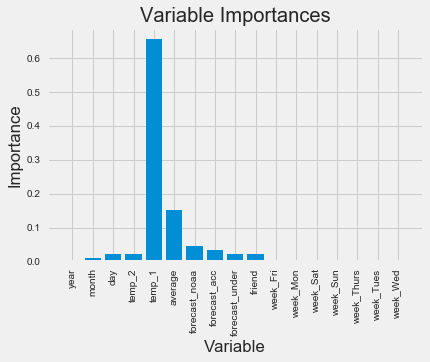

In [72]:
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

## We had a model accuracy of 94% and found which variables were most predictive in predicting temperature!